In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.transforms as transforms

<h3>Loading evaluation datasets for different distributions</h3>

In [2]:
gau_gau = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_gau_gau.csv', sep=",", header=0)
gau_uni = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_gau_uni.csv', sep=",", header=0)
uni_gau = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_uni_gau.csv', sep=",", header=0)
uni_uni = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_uni_uni.csv', sep=",", header=0)

In [3]:
gau_gau_Avg = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_gau_gau-AVG-Crimes.csv', sep=",", header=0)
gau_uni_Avg = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_gau_uni-AVG-Crimes.csv', sep=",", header=0)
uni_gau_Avg = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_uni_gau-AVG-Crimes.csv', sep=",", header=0)
uni_uni_Avg = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/eval_uni_uni-AVG-Crimes.csv', sep=",", header=0)

In [6]:
gau_gau_AVG_calls = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/gau_gau-AVG-Over-Calls.csv', sep=",", header=0)
gau_gau_COUNT_calls = pd.read_csv('/home/fotis/Dropbox/PhD/10.July - 2017/eval_results/gau_gau-COUNT-Over-Calls.csv', sep=",", header=0)

<h3>Setting font size</h3>

In [7]:
font_size = 22

<b>Remove outliers from COUNT dataset</b>

In [ ]:
# sdf1 = gau_gau
# sdf1 = gau_uni
# sdf1 = uni_gau
# sdf1 = uni_uni
# sdf = gau_gau_Avg
# sdf = gau_uni_Avg
# sdf = uni_gau_Avg
# sdf = uni_uni_Avg

0.912074566204
0.316835807018
0.912074566204


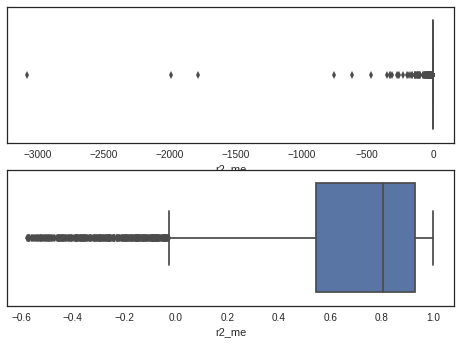

In [7]:
Q3 = sdf.r2_me.quantile(.75)
Q1 = sdf.r2_me.quantile(.25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(Q3)
outlier_point_max = Q3+ 1.5 * IQR
outlier_point_min = Q1-1.5*IQR
fig = plt.figure()
ax = fig.add_subplot(211)
sns.boxplot(sdf.r2_me,ax=ax)
sdf = sdf[sdf.r2_me < outlier_point_max]
sdf = sdf[sdf.r2_me > outlier_point_min]
ax = fig.add_subplot(212)
sns.boxplot(sdf.r2_me,ax=ax)

In [ ]:
sdf.count()[0]

0.67653987569
-0.325372128249
0.67653987569


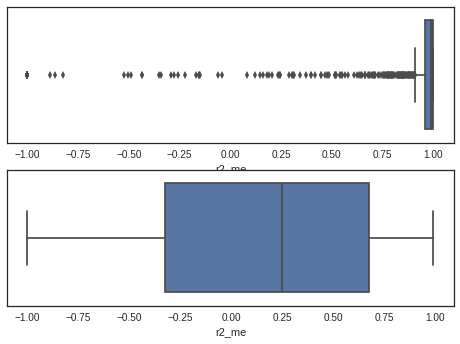

In [19]:
Q3 = gau_gau_Avg.r2_me.quantile(.75)
Q1 = gau_gau_Avg.r2_me.quantile(.25)
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(Q3)
outlier_point_max = Q3+ 1.5 * IQR
outlier_point_min = Q1-1.5*IQR
fig = plt.figure()
ax = fig.add_subplot(211)
sns.boxplot(sdf1.r2_me,ax=ax)
gau_gau_Avg = gau_gau_Avg[gau_gau_Avg.r2_me < outlier_point_max]
gau_gau_Avg = gau_gau_Avg[gau_gau_Avg.r2_me > outlier_point_min]
ax = fig.add_subplot(212)
sns.boxplot(gau_gau_Avg.r2_me,ax=ax)

In [ ]:
sdf1.count()[0]

<h3>Coefficient of determination</h3>

0.24991951753
0.998578757559
0.601482800931
0.982716896098
0.703082690852
0.998512399803
0.799122651077
0.974364935524
0.607416613565
0.990319280515


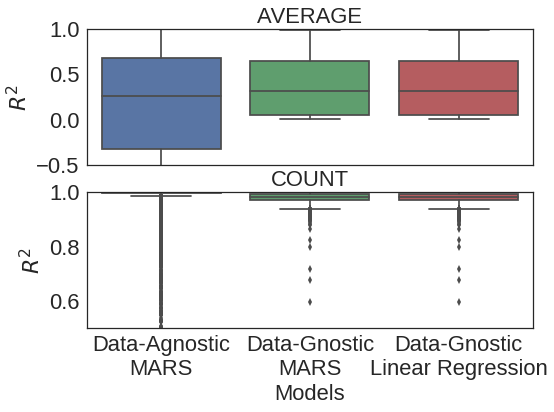

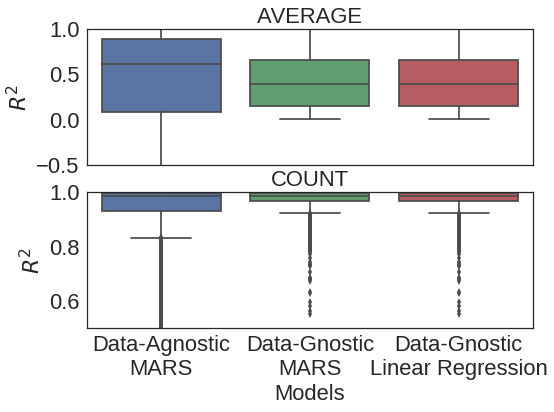

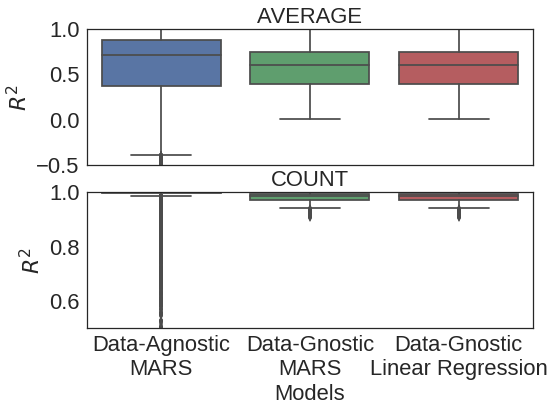

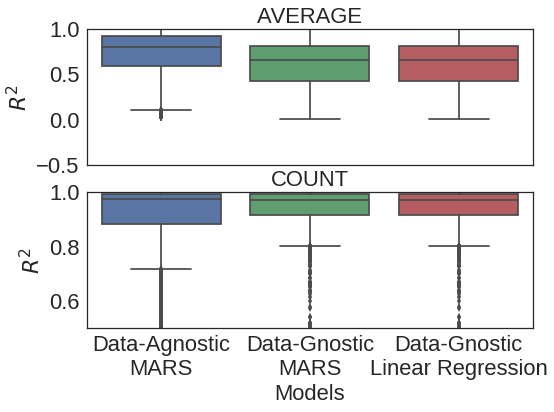

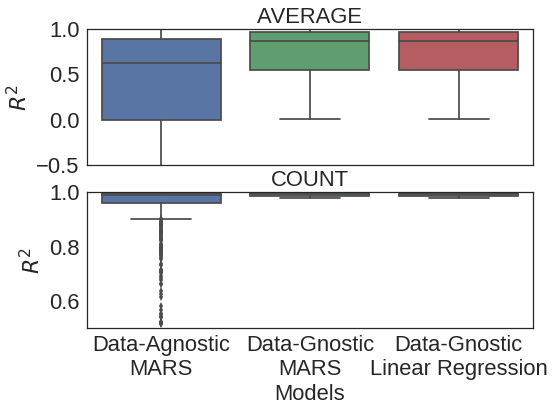

In [21]:
# sdf1 = gau_gau
# sdf1 = gau_uni
# sdf1 = uni_gau
# sdf1 = uni_uni
# sdf = gau_gau_Avg
# sdf = gau_uni_Avg
# sdf = uni_gau_Avg
# sdf = uni_uni_Avg

# sdf1 = gau_gau_COUNT_calls
# sdf = gau_gau_AVG_calls
sdf1s = [gau_gau, gau_uni, uni_gau, uni_uni, gau_gau_COUNT_calls]
sdfs = [gau_gau_Avg, gau_uni_Avg, uni_gau_Avg, uni_uni_Avg, gau_gau_AVG_calls]

for i in range(len(sdfs)):
    sdf = sdfs[i]
    sdf1 = sdf1s[i]

    fig = plt.figure()
    ax = fig.add_subplot(211)
    sdf[sdf.r2_me < -1] = -1
    print(sdf.r2_me.median())
    print(sdf1.r2_me.median())
    ddf = sdf.replace([np.inf, -np.inf], np.nan).dropna()
    ddf = ddf[['r2_me','r2_god','r2_knn']].stack().to_frame('r2')
    ddf = ddf.reset_index(level=1)

    ax = sns.boxplot(x="level_1", y="r2", data=ddf)
    trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)

    ax.set_xlabel("Models",size=font_size)
    ax.set_ylabel(r"$R^2$",size=font_size)

    plt.ylim(-0.5,1)

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'Query-Driven\nMARS'
    labels[1] = 'Data-Driven\nMARS'
    labels[2] = 'Data-Driven\nLinear Regression'

    ax.set_xticklabels(labels, visible=False)
    ax.tick_params(labelsize=font_size)
    ax.set_xlabel("")
    ax.set_title("AVERAGE",size=font_size)
    # ax.set_xlabel("Models", fontsize=font_size)
    ax.set_ylabel(r"$R^2$", fontsize=font_size)
    ax.legend(prop={'size':16})

    ax = fig.add_subplot(212)


    ddf = sdf1.replace([np.inf, -np.inf], np.nan).dropna()
    ddf = ddf[['r2_me','r2_god','r2_knn']].stack().to_frame('r2')
    ddf = ddf.reset_index(level=1)

    ax = sns.boxplot(x="level_1", y="r2", data=ddf)
    trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)

    ax.set_xlabel("Models",size=font_size)
    ax.set_ylabel(r"$R^2$",size=font_size)

    plt.ylim(0.5,1)

    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'Data-Agnostic\nMARS'
    labels[1] = 'Data-Gnostic\nMARS'
    labels[2] = 'Data-Gnostic\nLinear Regression'

    ax.set_title("COUNT",size=font_size)
    ax.set_xticklabels(labels)
    ax.tick_params(labelsize=font_size)
    ax.set_xlabel("Models", fontsize=font_size)
    ax.set_ylabel(r"$R^2$", fontsize=font_size)
    ax.legend(prop={'size':16})

In [14]:
sdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 23 columns):
Unnamed: 0        8000 non-null int64
closest_x         8000 non-null float64
closest_t         8000 non-null float64
r2_me             8000 non-null float64
r2_god            8000 non-null float64
r2_knn            8000 non-null float64
new_metric_m      8000 non-null float64
new_metric_g      7996 non-null float64
new_metric_knn    7979 non-null float64
cos_coef_m        8000 non-null float64
cos_coef_g        8000 non-null float64
cos_coef_l        8000 non-null float64
KL_m              8000 non-null float64
kl_g              8000 non-null float64
kl_knn            8000 non-null float64
entropy_p         8000 non-null float64
scaler            8000 non-null float64
time_me           8000 non-null float64
time_knn          8000 non-null float64
x                 8000 non-null float64
y                 8000 non-null float64
l                 8000 non-null float64
variance       

<h3>Slope Error</h3>

0.41476390206
0.996743573972


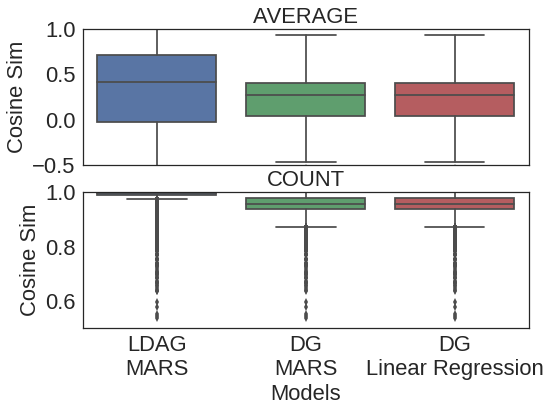

In [15]:
# sdf1 = gau_gau
# sdf1 = gau_uni
# sdf1 = uni_gau
# sdf1 = uni_uni
# sdf = gau_gau_Avg
# sdf = gau_uni_Avg
# sdf = uni_gau_Avg
# sdf = uni_uni_Avg
print(sdf.cos_coef_m.median())
print(sdf1.cos_coef_m.median())
fig = plt.figure()
ax = fig.add_subplot(211)

ddf = sdf[['cos_coef_m','cos_coef_g','cos_coef_l']].stack().to_frame('slope_error')
ddf = ddf.reset_index(level=1)

ax = sns.boxplot(x="level_1", y="slope_error", data=ddf)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)

ax.set_xlabel("Models",size=font_size)
ax.set_ylabel("Slope Error",size=font_size)

plt.ylim(-0.5,1)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Query-Driven\nMARS'
labels[1] = 'Data-Driven\nMARS'
labels[2] = 'Data-Driven\nLinear Regression'

ax.set_xticklabels(labels, visible=False)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("")
ax.set_title("AVERAGE",size=font_size)
# ax.set_xlabel("Models", fontsize=font_size)
ax.set_ylabel("Cosine Sim", fontsize=font_size)
ax.legend(prop={'size':16})

ax = fig.add_subplot(212)


ddf = sdf1[['cos_coef_m','cos_coef_g','cos_coef_l']].stack().to_frame('slope_error')
ddf = ddf.reset_index(level=1)

ax = sns.boxplot(x="level_1", y="slope_error", data=ddf)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)

ax.set_xlabel("Models",size=font_size)
ax.set_ylabel("Cosine Sim",size=font_size)

plt.ylim(0.5,1)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'LDAG\n'
labels[1] = 'Data-Gnostic\nMARS'
labels[2] = 'Data-Gnostic\nLinear Regression'

ax.set_title("COUNT",size=font_size)
ax.set_xticklabels(labels)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("Models", fontsize=font_size)
ax.set_ylabel("Cosine Sim", fontsize=font_size)
ax.legend(prop={'size':16})

<h3>KL-Divergence</h3>

0.396430346454


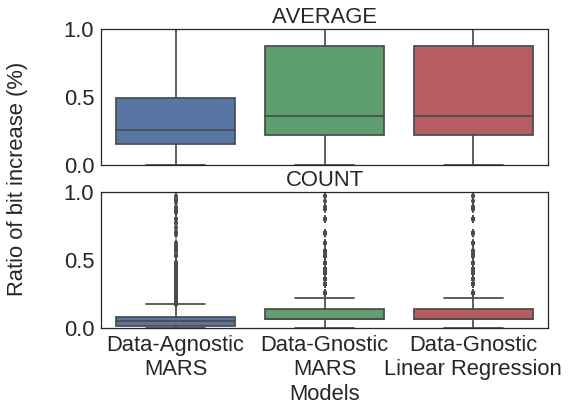

In [24]:
# sdf = gau_gau
sdf = gau_uni
# sdf = uni_gau
# sdf = uni_uni
# sdf1 = gau_gau_Avg
sdf1 = gau_uni_Avg
# sdf1 = uni_gau_Avg
# sdf1 = uni_uni_Avg

print(sdf1['kl_me'].median())
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_ylabel("Ratio of bit increase (%)", fontsize=font_size)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelsize=32, labelcolor='w', top='off', bottom='off', left='off', right='off')

ax = fig.add_subplot(211)



pdf = sdf1.replace([np.inf, -np.inf], np.nan).dropna()
ddf = pdf[['kl_me','kl_g','kl_knn']].stack().to_frame('KL-Divergence')
ddf = ddf.reset_index(level=1)
#Scaling to percentages
ddf['KL-Divergence']=ddf['KL-Divergence'].multiply(pdf['scaler'], axis='index')

ax = sns.boxplot(x="level_1", y="KL-Divergence", data=ddf)
# trans = transforms.blended_transform_factory(
#     ax.get_yticklabels()[0].get_transform(), ax.transData)
plt.ylim(0, 1)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Query-Driven\nMARS'
labels[1] = 'Data-Driven\nMARS'
labels[2] = 'Data-Driven\nLinear Regression'

ax.set_xticklabels(labels, visible=False)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("")
ax.set_title("AVERAGE",size=font_size)
ax.set_ylabel("", fontsize=font_size)
ax.legend(prop={'size':16})


ax = fig.add_subplot(212)


pdf = sdf.replace([np.inf, -np.inf], np.nan).dropna()
ddf = pdf[['KL_m','kl_g','kl_knn']].stack().to_frame('KL-Divergence')
ddf = ddf.reset_index(level=1)
#Scaling to percentages
ddf['KL-Divergence']=ddf['KL-Divergence'].multiply(pdf['scaler'], axis='index')

ax = sns.boxplot(x="level_1", y="KL-Divergence", data=ddf)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)



plt.ylim(0, 1)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Data-Agnostic\nMARS'
labels[1] = 'Data-Gnostic\nMARS'
labels[2] = 'Data-Gnostic\nLinear Regression'

ax.set_title("COUNT",size=font_size)
ax.set_xticklabels(labels)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("Models", fontsize=font_size)
ax.set_ylabel("", fontsize=font_size)
ax.legend(prop={'size':16})
# fig.text(0.000006, 0.5, 'Ratio of bit increase (%)', va='center', rotation='vertical' ,fontsize=font_size)

<h3>Time</h3>

In [ ]:
sdf = gau_gau
# sdf = gau_uni
# sdf = uni_gau
# sdf = uni_uni



ddf = sdf[['time_me','time_g']].stack().to_frame('time')
ddf = ddf.reset_index(level=1)
# ddf['time']=(ddf['time']*1000).apply(np.log)

ax = sns.boxplot(x="level_1", y="time", data=ddf)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Data-Agnostic'
labels[1] = 'Data-Gnostic'

ax.set_xticklabels(labels)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("Models", fontsize=font_size)
ax.set_ylabel("Time (log(ms))", fontsize=font_size)
ax.legend(prop={'size':16})
sdf[['time_me','time_g']].median()

<h3>Alternative to  $R^2$</h3>

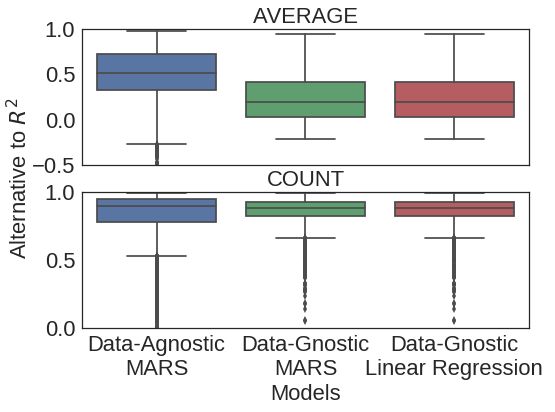

In [25]:
# sdf1 = gau_gau
sdf1 = gau_uni
# sdf1 = uni_gau
# sdf1 = uni_uni
# sdf = gau_gau_Avg
sdf = gau_uni_Avg
# sdf = uni_gau_Avg
# sdf = uni_uni_Avg

fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_ylabel(r'Alternative to $R^2$', fontsize=font_size)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelsize=28, labelcolor='w', top='off', bottom='off', left='off', right='off')



ax = fig.add_subplot(211)

ddf = sdf[['new_metric_m','new_metric_g','new_metric_knn']].stack().to_frame('r2_new')
ddf = ddf.reset_index(level=1)

plt.ylim(-0.5,1)
sns.boxplot(x="level_1", y="r2_new", data=ddf, ax=ax)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Data-Agnostic\nMARS'
labels[1] = 'Data-Gnostic\nMARS'
labels[2] = 'Data-Gnostic\nLinear Regression'

ax.set_xticklabels(labels, visible=False)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("")
ax.set_title("AVERAGE",size=font_size)
# ax.set_xlabel("Models", fontsize=font_size)
ax.set_ylabel("", fontsize=font_size)
ax.legend(prop={'size':16})

ax = fig.add_subplot(212)


ddf = sdf1[['new_metric_m','new_metric_g','new_metric_knn']].stack().to_frame('r2_new')
ddf = ddf.reset_index(level=1)

plt.ylim(0,1)
sns.boxplot(x="level_1", y="r2_new", data=ddf, ax=ax)
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Data-Agnostic\nMARS'
labels[1] = 'Data-Gnostic\nMARS'
labels[2] = 'Data-Gnostic\nLinear Regression'
ax.set_title("COUNT",size=font_size)
ax.set_xticklabels(labels)
ax.tick_params(labelsize=font_size)
ax.set_xlabel("Models", fontsize=font_size)
ax.set_ylabel("", fontsize=font_size)
ax.legend(prop={'size':16})